<a href="https://colab.research.google.com/github/Shubham-Khatrii/hdd/blob/main/Analyzing_Simulated_Data_for_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import pandas as pd

# Define the number of customers
num_customers = 1000

# Generate random data for customer features
age = np.random.randint(18, 65, size=num_customers)
income = np.random.normal(50000, 15000, size=num_customers)
spending_score = np.random.uniform(0, 100, size=num_customers)

# Create a Pandas DataFrame
customer_data = pd.DataFrame({'Age': age, 'Income': income, 'SpendingScore': spending_score})

customer_data.head()

,Age,Income,SpendingScore
0,59,12845.116716,10.571761
1,58,71489.719624,21.514678
2,20,47872.475024,65.341791
3,36,56503.719169,36.226680
4,55,40101.485856,64.756462


In [10]:
# prompt: Using dataframe customer_data: graph

import altair as alt

alt.Chart(customer_data).mark_circle().encode(
    x='Age',
    y='Income',
    color='SpendingScore',
    tooltip=['Age', 'Income', 'SpendingScore']
).interactive()


alt.Chart(...)

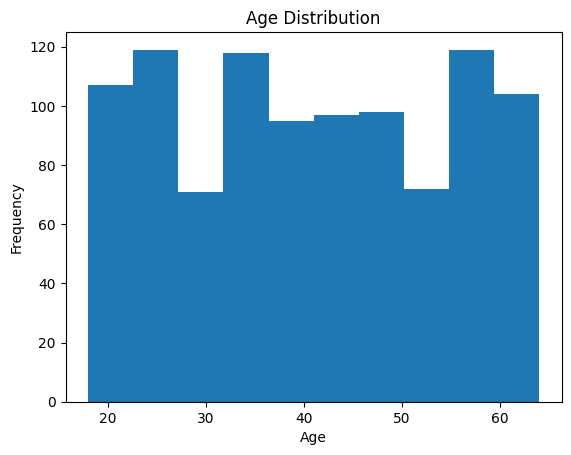

In [8]:
# Calculate basic statistics
customer_data.describe()

# Visualize data distributions
import matplotlib.pyplot as plt

plt.hist(customer_data['Age'], bins=10)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Similar histograms for Income and SpendingScore
# ...

In [11]:
from sklearn.cluster import KMeans

# Select features for clustering (Age, Income, SpendingScore)
X = customer_data[['Age', 'Income', 'SpendingScore']]

# Determine the optimal number of clusters (e.g., using the elbow method)
# ...

# Apply K-means clustering
kmeans = KMeans(n_clusters=4) # Assuming 4 clusters
customer_data['Cluster'] = kmeans.fit_predict(X)

# Analyze the clusters
cluster_means = customer_data.groupby('Cluster')[['Age', 'Income', 'SpendingScore']].mean()
print(cluster_means) # To see the output, run the code.

               Age        Income  SpendingScore
Cluster                                        
0        40.586510  43815.476648      50.226375
1        38.609756  73670.854076      50.780475
2        41.303207  57777.436238      51.473247
3        42.500000  27542.275734      49.316480


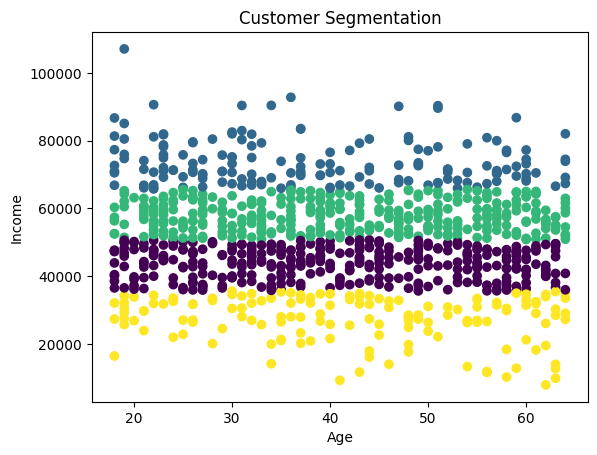

In [13]:
# Scatter plot of clusters (e.g., Age vs. Income)
plt.scatter(customer_data['Age'], customer_data['Income'], c=customer_data['Cluster'])
plt.title('Customer Segmentation')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()